# Data

I will be working with FBI Gun data from github, the data can be downloaded from  https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a5623_ncis-and-census-data/ncis-and-census-data.zip


# Questions:

* which state has the highest growth in gun registration
* What is the overall trend of gun purchases?
* which features best ddetemine a good trend for analysis

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

# Data Wrangling

In [2]:
#load gun data
df1 = pd.read_excel("data/gun_data.xlsx")

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [4]:
#load census dataset
df2 = pd.read_csv("data/U.S. Census Data.csv")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [5]:
sum(df2.duplicated())

3

### Issues
1. missing values in df1 dataset(10, object and 3 float)
2. missing values in df2
3. column names to lower case in df2
4. duplicates in df2 dataset
5. admin to integers

## Data Cleaning

##### Issue 1

* fill missing values with median for numbers, first put all the missing values in a list, then write a function that iterate through each item in the list and fills them with their respective median values

In [6]:
float_variable = ["permit", "permit_recheck", "return_to_seller_other", "return_to_seller_long_gun", "return_to_seller_handgun", 
         "private_sale_other", "private_sale_long_gun", "private_sale_handgun", "rentals_long_gun", "other",
         "rentals_handgun", "returned_other", "returned_long_gun", "returned_handgun", "redemption_other", "redemption_long_gun",
         "redemption_handgun", "prepawn_other", "prepawn_long_gun", "prepawn_handgun", "handgun", "long_gun", "admin"]

In [7]:
#missing values in df1
def float_missing_fill(data):
    for col in float_variable:
        data[col] = data[col].fillna(data[col].median())

In [8]:
float_missing_fill(df1)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12485 non-null  float64
 3   permit_recheck             12485 non-null  float64
 4   handgun                    12485 non-null  float64
 5   long_gun                   12485 non-null  float64
 6   other                      12485 non-null  float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12485 non-null  float64
 9   prepawn_handgun            12485 non-null  float64
 10  prepawn_long_gun           12485 non-null  float64
 11  prepawn_other              12485 non-null  float64
 12  redemption_handgun         12485 non-null  float64
 13  redemption_long_gun        12485 non-null  flo

#### Issue 2

* fill missing values with mode for objects, first put all the missing values in a list, then write a function that iterate through each item in the list and fills them with their respective mode values

In [10]:
obj_variables = ["Maryland", "Maine", "Louisiana", "Kentucky", "Kansas", "Iowa", "Indiana", "Illinois", "Idaho", "Hawaii", "Georgia", 
      "Florida", "Connecticut", "Delaware", "Colorado", "California", "Arkansas", "Arizona", "Alaska", "Alabama", "Fact Note", "Fact",
      "Wyoming", "Wisconsin", "West Virginia", "Washington", "Virginia", "Vermont", "Utah", "Texas", "Tennessee", "South Dakota", "South Carolina",
      "Rhode Island", "Pennsylvania", "Oregon", "Oklahoma", "Ohio", "North Dakota", "North Carolina", "New York", "New Mexico", "New Jersey",
      "New Hampshire", "Nevada", "Nebraska", "Montana", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri"]

In [11]:
#missing values in df2 with mode
def obj_missing_fill(data):
    for col in obj_variables:
        data[col] = data[col].fillna(data[col].mode()[0])

In [12]:
#filling missing values in df2 using the function missing_data_obj
obj_missing_fill(df2)

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            85 non-null     object
 1   Fact Note       85 non-null     object
 2   Alabama         85 non-null     object
 3   Alaska          85 non-null     object
 4   Arizona         85 non-null     object
 5   Arkansas        85 non-null     object
 6   California      85 non-null     object
 7   Colorado        85 non-null     object
 8   Connecticut     85 non-null     object
 9   Delaware        85 non-null     object
 10  Florida         85 non-null     object
 11  Georgia         85 non-null     object
 12  Hawaii          85 non-null     object
 13  Idaho           85 non-null     object
 14  Illinois        85 non-null     object
 15  Indiana         85 non-null     object
 16  Iowa            85 non-null     object
 17  Kansas          85 non-null     object
 18  Kentucky    

#### Issue 3

* convert column names in df2 to lower case

In [14]:
df2.rename(columns=lambda X: X.strip().lower(), inplace=True)

In [15]:
df2.head()

,fact,fact note,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,...,south dakota,tennessee,texas,utah,vermont,virginia,washington,west virginia,wisconsin,wyoming
0,"Population estimates, July 1, 2016, (V2016)",(c),"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",(c),"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",(c),1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",(c),"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",(c),6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


#### Issue 4

In [16]:
# remove the duplicates in df2
df2.drop_duplicates(inplace=True)

In [17]:
sum(df2.duplicated())

0

#### Issue 5

* convert admin from float to integers in df1

In [18]:
df1["admin"] = df1["admin"].astype(int)

In [19]:
df1["admin"].dtype

dtype('int32')

## Exploratory Data Analysis

In [20]:
df1.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


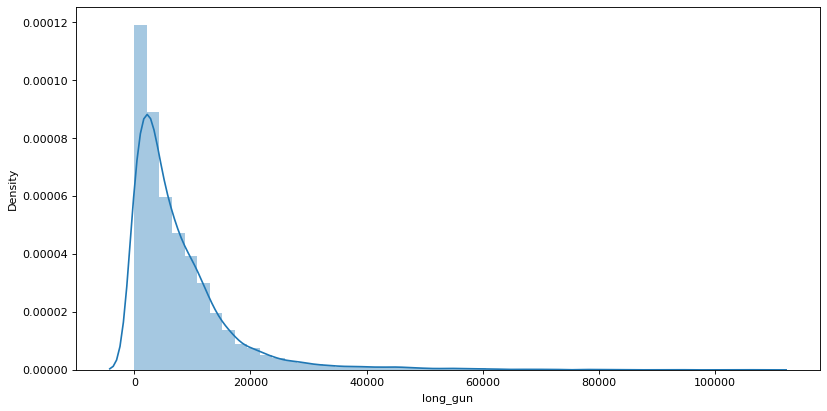

In [21]:
def plot_histogram():
    plt.figure(figsize=(12, 6), dpi=80)
    sb.distplot(df1['long_gun']);
plot_histogram()

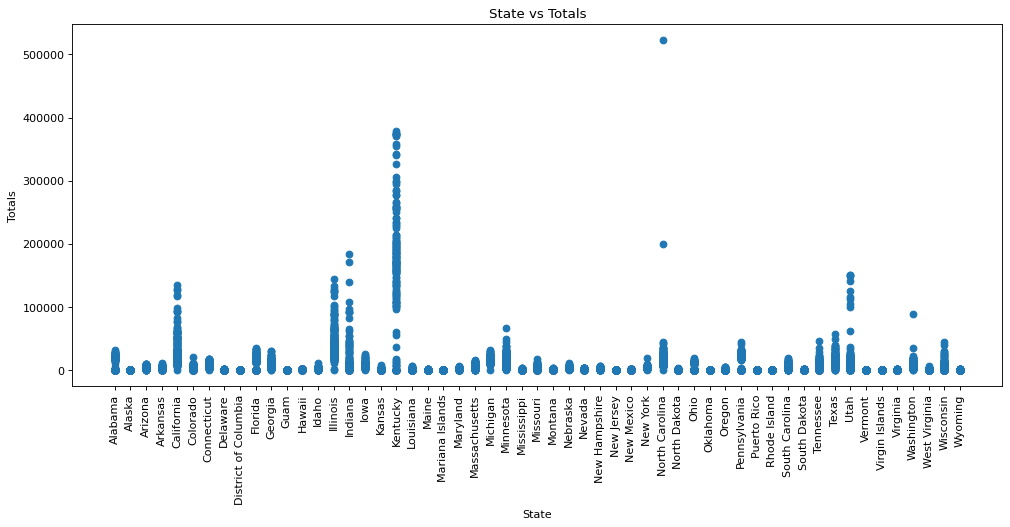

In [22]:
def scatter_plot_1():
    plt.figure(figsize=(15, 6), dpi=80)
    plt.scatter(df1.state, df1.permit);
    plt.xlabel("State");
    plt.ylabel("Totals");
    plt.title("State vs Totals");
    plt.xticks(rotation=90)
scatter_plot_1()

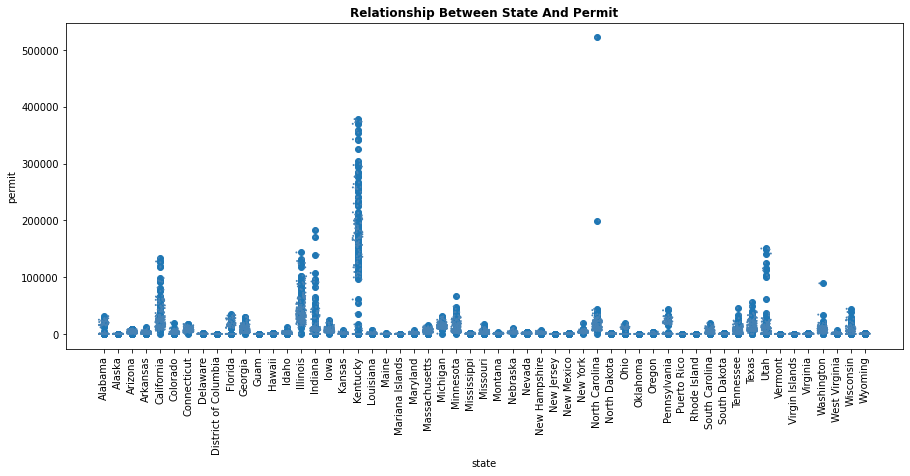

In [59]:
def scatter_plot_3(xvar, yvar):
    plt.figure(figsize=(15, 6))
    sb.stripplot(data=df1, x=xvar, y=yvar, jitter=0.35, color='steelblue', size=2)
    plt.scatter(df1.state, df1.permit);
    plt.xlabel(xvar);
    plt.ylabel(yvar);
    plt.title(f'Relationship between {xvar} and {yvar}'.title(), weight='bold');
    plt.xticks(rotation=90)
scatter_plot_3('state', 'permit')

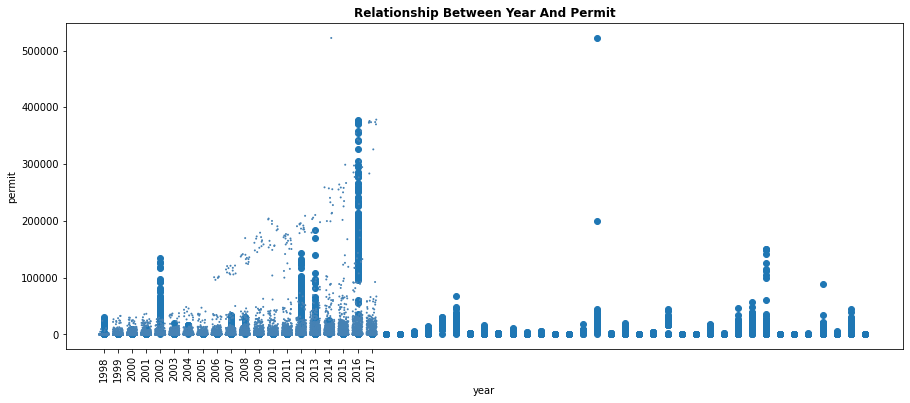

In [60]:
scatter_plot_3('year', 'permit')

This shows no trend a dependent and an independent variable

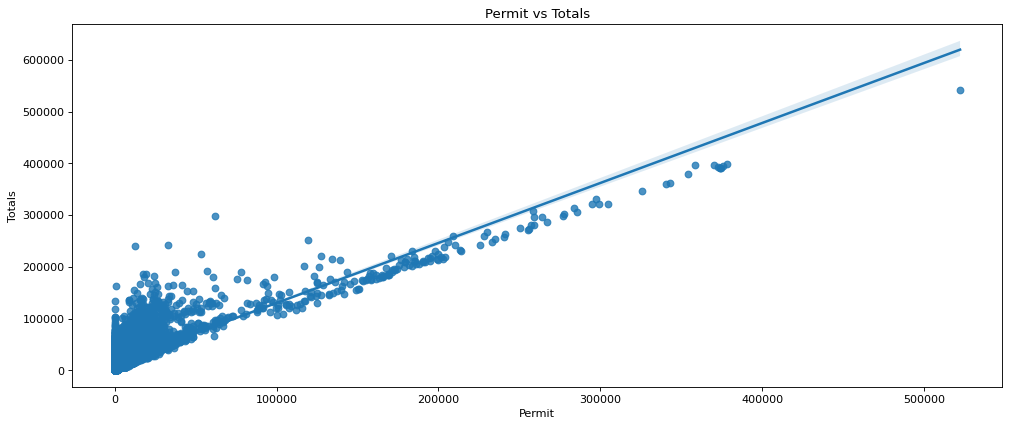

In [23]:
def scatter_plot_2():
    plt.figure(figsize=(15, 6), dpi=80)
    sb.regplot(data=df1, x='permit', y='totals', x_jitter=0.3);
    plt.xlabel("Permit");
    plt.ylabel("Totals");
    plt.title("Permit vs Totals");
scatter_plot_2()

This shows a positive trend between a dependent and an independent variable

* Pie chart is not favourable for the admin because it has large number of slices

In [54]:
def plot_piechart(grpvar, yvar, top=5):
    sorted_counts = df1.groupby([grpvar])[yvar].sum().sort_values(ascending=False).head()
    plt.pie(sorted_counts, labels=sorted_counts.index, startangle=90, counterclock=False, wedgeprops={'width': 0.4});
    plt.axis('square');
    plt.title(f'Top Five {grpvar} with Highest {yvar}')
    plt.xticks(rotation=90)
    plt.legend(loc='center left', bbox_to_anchor=(1, 1))

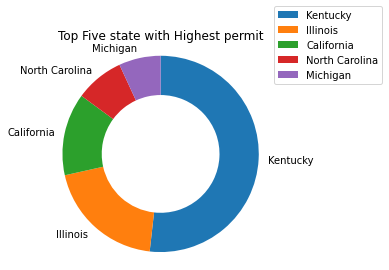

In [55]:
plot_piechart('state', 'permit')

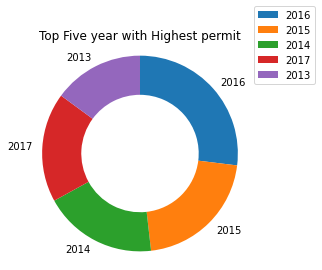

In [56]:
df1["month"]=pd.to_datetime(df1['month'])
#create year variable
df1['year'] = df1['month'].dt.year
plot_piechart('year', 'permit')

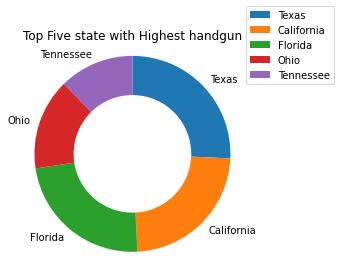

In [57]:
plot_piechart('state', 'handgun')

## Conclusions

In [25]:
#which state has the highest growth in gun registration
df1.state.describe()

count       12485
unique         55
top       Alabama
freq          227
Name: state, dtype: object

In [26]:
df1.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,...,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000
mean,6402.296195,102.727433,5936.264557,7806.755627,226.494113,268.603364,58.789588,4.076652,6.769483,0.067841,...,0.149379,0.006087,0.005767,3.289868,2.555707,0.226912,0.079696,0.097317,0.019143,21595.725911
std,23730.901057,2756.731662,8612.448838,9303.349384,903.491206,783.185073,604.262697,10.174706,15.332543,0.681467,...,1.710795,0.179790,0.173912,33.987054,25.908792,2.139596,0.663611,0.740136,0.186114,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,868.000000,2079.000000,121.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4257.000000,0.000000,7277.000000,10374.000000,121.000000,301.000000,0.000000,3.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [27]:
df1.groupby("totals")["state"].max()

totals
0          Virgin Islands
1          Virgin Islands
2             Puerto Rico
3         Mariana Islands
4         Mariana Islands
               ...       
394718           Kentucky
397059           Kentucky
397959           Kentucky
398706           Kentucky
541978     North Carolina
Name: state, Length: 10218, dtype: object

In [28]:
f"The state with the highest state in gun registration with {df1.totals.max()} is North Carolina"

'The state with the highest state in gun registration with 541978 is North Carolina'

In [29]:
df1_concat_var = pd.concat([df1["state"], df1["long_gun"]], axis=1)
df1_concat_var.value_counts()

state                 long_gun
Hawaii                0.0         223
Mariana Islands       0.0         157
District of Columbia  0.0         126
Virgin Islands        0.0          83
District of Columbia  1.0          39
                                 ... 
Louisiana             9994.0        1
                      10055.0       1
                      10078.0       1
                      10194.0       1
Wyoming               4722.0        1
Length: 11098, dtype: int64

In [30]:
total_mnth_concat = pd.concat([df1["totals"], df1["month"]], axis=1)
total_mnth_concat.head()

,totals,month
0,32019,2017-09
1,6303,2017-09
2,28394,2017-09
3,17747,2017-09
4,123506,2017-09


In [31]:
#What census data is most associated with high gun per capital?
df2.describe()

,fact,fact note,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,...,south dakota,tennessee,texas,utah,vermont,virginia,washington,west virginia,wisconsin,wyoming
count,82,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,(a),(c),"""01""",7.30%,50.30%,50.90%,50.30%,3.30%,0.10%,51.60%,...,"""46""",0.048,50.40%,2.50%,1.90%,"""51""","""53""",1.50%,"""55""",7.10%
freq,3,60,18,19,19,19,19,19,19,19,...,18,19,19,19,19,18,18,19,18,19


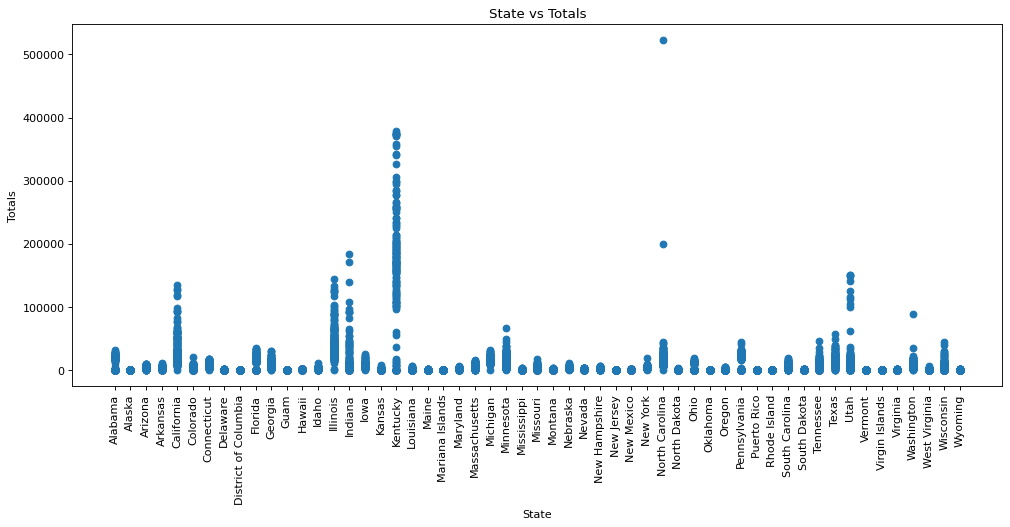

In [32]:
#What is the overall trend of gun purchases?
scatter_plot_1()

In [33]:
#What features are associated with better gun registration?
top_08 = df1.query('permit > totals.mean()')
top_08.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,...,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000
mean,68106.828061,238.646492,18344.994498,16279.171939,936.480055,529.193948,8.574966,4.982118,6.071527,0.189821,...,0.294360,0.026135,0.011004,5.751032,4.548831,0.409904,0.195323,0.231087,0.055021,106378.730399
std,72947.159071,4328.784020,17056.955958,12935.165239,3497.926180,681.432365,34.530492,9.296373,9.551966,0.581871,...,1.838151,0.241960,0.128092,31.239234,25.902073,2.101373,0.738795,0.812419,0.305593,73831.145266
min,21599.000000,0.000000,22.000000,2289.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26714.000000
25%,25811.000000,0.000000,5863.000000,8420.000000,86.500000,140.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53597.000000
50%,34101.000000,0.000000,12155.000000,12137.000000,121.000000,384.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,81115.000000
75%,69893.000000,0.000000,25345.500000,19737.000000,702.000000,613.000000,0.000000,7.000000,9.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,132222.500000
max,522188.000000,86680.000000,107224.000000,105826.000000,77929.000000,5639.000000,264.000000,59.000000,58.000000,4.000000,...,36.000000,4.000000,2.000000,559.000000,482.000000,37.000000,8.000000,7.000000,3.000000,541978.000000


### Conclusions

1. There is a strong correlation between permit and total, they will be a good feature in deciding gun registration
2. Hawaaii has the highest number of long_gun registration
3. North Carolina has the highest number of total gun registration
4. The month 09 and year 20's have more gun registrationthan the 1990's

### Limitations

1. Description of features, what each feature is meant for, example other, and multiple not clearly understood.
2. categorical values are few and have the same number of count making it hard to find a trens in them